In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def newtonMethodMultiDim(objective,
                         gradient,
                         hessian,
                         x0,
                         tolerance,
                         minima=True,
                         max_iterations=10000):
    """
    Implementation for the Newton's Method for unconstrained optimization problems i.e. 
    
    min f(x) or max f(x)
    s.t. x in R^n and f: R^n -> R

    Parameters
    ----------
    objective : function 
        The objective function for which the maximum/minima needs to be found.
    gradient : function
        The gradient of the objective function.
    hessian : function
        The hessian of the objective function.
    x0 : numpy array
        The initial guess for the maximum/minima.
    tolerance : float
        The tolerance for the stopping criteria.
    minima : bool
        If True, the algorithm will search for the minima, else it will 
        search for the maxima.
    max_iterations : int
        The maximum number of iterations for the algorithm if the algorithm
        does not converge.
    
    Returns
    -------
    optima : numpy array
        The optimal argument of the objective function.
    optimum : float
        The optimal value of the objective function.
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the 
        local variables of the algorithm for purposes like plotting or debugging.
    """

    ####################################
    # WRITE THE CODE FOR THIS FUNCTION #
    ####################################
    # Initialize the variables
    x = x0
    iteration = 0
    optimum = objective(x)
    gradient_x = gradient(x)
    hessian_x = hessian(x)
    cache = []
    # Run the algorithm
    while np.linalg.norm(gradient_x) > tolerance and iteration < max_iterations:
        # Compute the search direction
        if minima:
            search_direction = -np.linalg.solve(hessian_x, gradient_x)
        else:
            search_direction = np.linalg.solve(hessian_x, gradient_x)
        # Update the variables
        x = x + search_direction
        optimum = objective(x)
        gradient_x = gradient(x)
        hessian_x = hessian(x)
        iteration += 1
        # Cache the values
        cache.append((x, optimum, gradient_x, hessian_x,search_direction))
    # Return the values
    return x, optimum, cache

In [7]:
def objective_function_1(x):
   return x[0]**5 + x[1]**4 + x[2]**3

def gradient_function_1(x):
    return np.array([5 * x[0]**4, 4 * x[1]**3, 3 * x[2]**2])

def hessian_function_1(x):
    return np.array([[20 * x[0]**3, 0, 0],
                     [0, 12 * x[1]**2, 0],
                     [0, 0, 6 * x[2]]])

def objective_function_2(x):
    return x[0]**4 + x[1]**4 + x[2]**4

def gradient_function_2(x):
    return np.array([4*x[0]**3, 4*x[1]**3, 4*x[2]**3])

def hessian_function_2(x):
    return np.array([[12*x[0]**2, 0, 0], [0, 12*x[1]**2, 0], [0, 0, 12*x[2]**2]])

# Example usage for function 1
x0_func1 = np.array([1.0, 2.0, 3.0])
tolerance_func1 = 1e-6
result_func1 = newtonMethodMultiDim(objective_function_1, gradient_function_1, hessian_function_1, x0_func1, tolerance_func1)
print("Optimal argument for Function 1:", result_func1[0])
print("Optimal value for Function 1:", result_func1[1])

# Example usage for function 2
x0_func2 = np.array([1.0, 2.0, 3.0])
tolerance_func2 = 1e-6
result_func2 = newtonMethodMultiDim(objective_function_2, gradient_function_2, hessian_function_2, x0_func2, tolerance_func2)
print("Optimal argument for Function 2:", result_func2[0])
print("Optimal value for Function 2:", result_func2[1])

Optimal argument for Function 1: [1.33634610e-02 4.56731652e-03 9.15527344e-05]
Optimal value for Function 1: 8.621045061457089e-10
Optimal argument for Function 2: [0.00152244 0.00304488 0.00456732]
Optimal value for Function 2: 5.264843864015215e-10


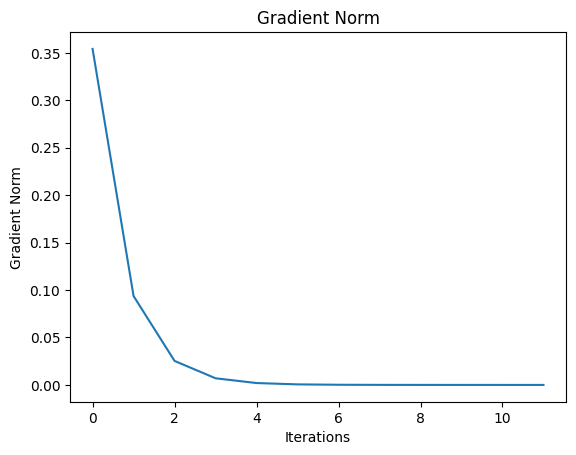

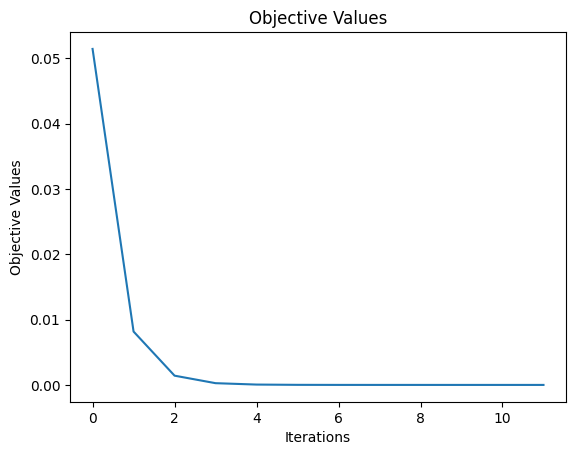

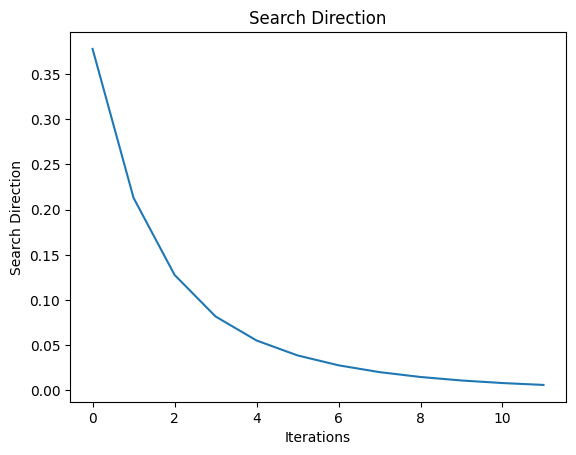

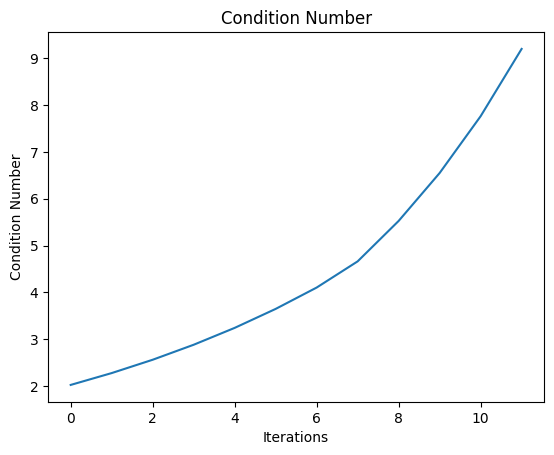

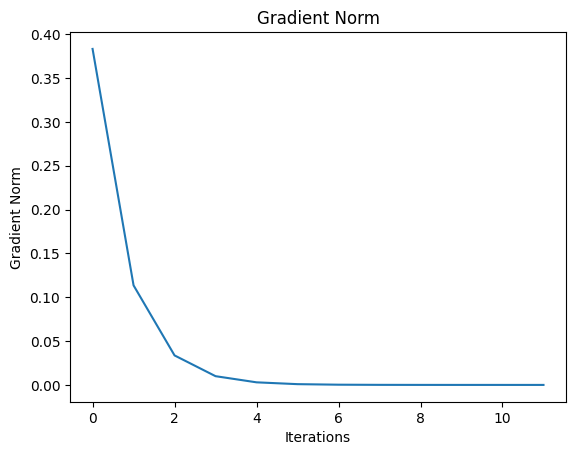

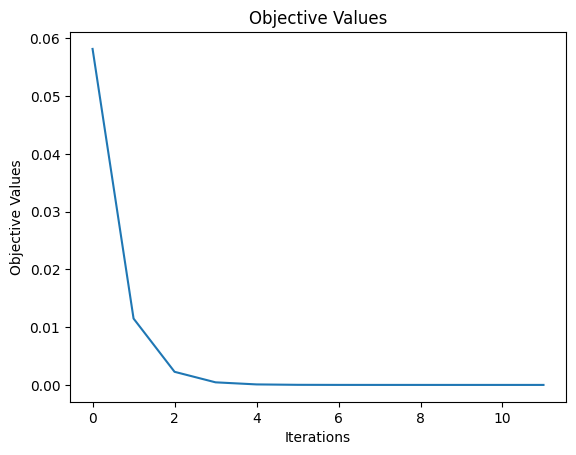

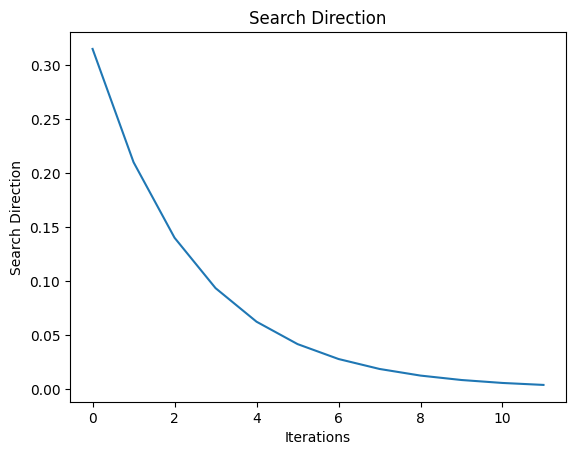

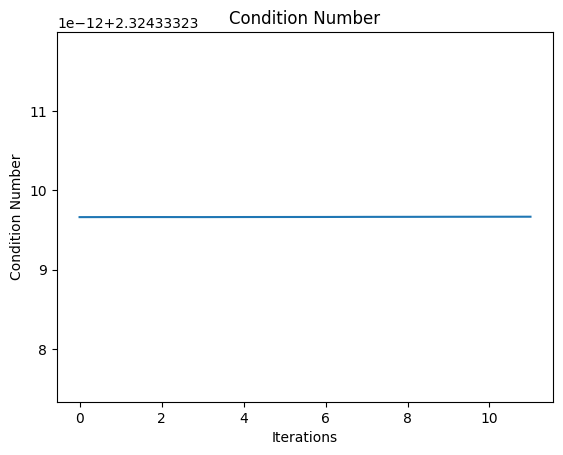

In [10]:
x0 = np.random.rand(3)
tolerance = 1e-6
max_iterations = 10000
# Run the algorithm
result = newtonMethodMultiDim(objective_function_1, gradient_function_1, hessian_function_1, x0, tolerance)
# Plot the values
cache = result[2]
gradient_norm = [np.linalg.norm(gradient) for _, _, gradient, _, _ in cache]
objective_values = [value for _, value, _, _, _ in cache]
search_direction = [np.linalg.norm(direction) for _, _, _, _, direction in cache]
condition_number = [np.linalg.cond(hessian) for _, _, _, hessian, _ in cache]
# Plot the values
plt.figure()
plt.plot(gradient_norm)
plt.title('Gradient Norm')
plt.xlabel('Iterations')
plt.ylabel('Gradient Norm')
plt.show()
plt.figure()
plt.plot(objective_values)
plt.title('Objective Values')
plt.xlabel('Iterations')
plt.ylabel('Objective Values')
plt.show()
plt.figure()
plt.plot(search_direction)
plt.title('Search Direction')
plt.xlabel('Iterations')
plt.ylabel('Search Direction')
plt.show()
plt.figure()
plt.plot(condition_number)
plt.title('Condition Number')
plt.xlabel('Iterations')
plt.ylabel('Condition Number')
plt.show()
# Run the algorithm
result = newtonMethodMultiDim(objective_function_2, gradient_function_2, hessian_function_2, x0, tolerance)
# Plot the values
cache = result[2]
gradient_norm = [np.linalg.norm(gradient) for _, _, gradient, _, _ in cache]
objective_values = [value for _, value, _, _, _ in cache]
search_direction = [np.linalg.norm(direction) for _, _, _, _, direction in cache]
condition_number = [np.linalg.cond(hessian) for _, _, _, hessian, _ in cache]
# Plot the values
plt.figure()
plt.plot(gradient_norm)
plt.title('Gradient Norm')
plt.xlabel('Iterations')
plt.ylabel('Gradient Norm')
plt.show()
plt.figure()
plt.plot(objective_values)
plt.title('Objective Values')
plt.xlabel('Iterations')
plt.ylabel('Objective Values')
plt.show()
plt.figure()
plt.plot(search_direction)
plt.title('Search Direction')
plt.xlabel('Iterations')
plt.ylabel('Search Direction')
plt.show()
plt.figure()
plt.plot(condition_number)
plt.title('Condition Number')
plt.xlabel('Iterations')
plt.ylabel('Condition Number')
plt.show()
